In [25]:
from statistics import mean, stdev, median
from typing import List, Dict

from matplotlib import pyplot as plt

from src.data.const import GRAVE_ACCENT, ACUTE_ACCENT, TILDE_ACCENT
from src.data.processing import (
    load_texts,
    filter_punctuations,
    remove_stress_marks,
    remove_character_before_stress_marks,
)
from src.data.tokenizer import Tokenizer
from src.data.vocab import Vocab
from src.paths import DATA_DIR

In [26]:
def sort_vocab_freq(vocab: Vocab) -> Dict:
    return dict(sorted(vocab.token_freq.items(), key=lambda item: item[1], reverse=True))


def summary(texts: List[str]) -> None:
    vocab = Vocab.init_from_texts(texts)

    words = [word for text in texts for word in filter_punctuations(text).split()]
    word_counts_per_text = [len(filter_punctuations(text).split()) for text in texts]
    character_counts_per_text = [len(text) for text in texts]
    character_counts_per_word = [len(word) for word in words]

    num_grave = vocab.token_freq[GRAVE_ACCENT]
    num_acute = vocab.token_freq[ACUTE_ACCENT]
    num_tilde = vocab.token_freq[TILDE_ACCENT]
    num_accent_marks = num_grave + num_acute + num_tilde

    print(f"""
    Word statistics (Per Text):
        Total:  {sum(word_counts_per_text):>10}
        Unique: {len(set(words)):>10}
        Mean:   {mean(word_counts_per_text) if len(word_counts_per_text) > 0 else 0:>10.2f}
        STD:    {stdev(word_counts_per_text) if len(word_counts_per_text) > 1 else 0:>10.2f}
        Median: {median(word_counts_per_text) if len(word_counts_per_text) > 0 else 0:>10.2f}
        Min:    {min(word_counts_per_text) if len(word_counts_per_text) > 0 else 0:>10}
        Max:    {max(word_counts_per_text) if len(word_counts_per_text) > 0 else 0:>10}

    Character statistics (Per Text):
        Total:  {sum(character_counts_per_text):>10}
        Mean:   {mean(character_counts_per_text) if len(character_counts_per_text) > 0 else 0:>10.2f}
        STD:    {stdev(character_counts_per_text) if len(character_counts_per_text) > 1 else 0:>10.2f}
        Median: {median(character_counts_per_text) if len(character_counts_per_text) > 0 else 0:>10.2f}
        Min:    {min(character_counts_per_text) if len(character_counts_per_text) > 0 else 0:>10}
        Max:    {max(character_counts_per_text) if len(character_counts_per_text) > 0 else 0:>10}

    Character statistics (Per Word):
        Total:  {sum(character_counts_per_word):>10}
        Mean:   {mean(character_counts_per_word) if len(character_counts_per_word) > 0 else 0:>10.2f}
        STD:    {stdev(character_counts_per_word) if len(character_counts_per_word) > 1 else 0:>10.2f}
        Median: {median(character_counts_per_word) if len(character_counts_per_word) > 0 else 0:>10.2f}
        Min:    {min(character_counts_per_word) if len(character_counts_per_word) > 0 else 0:>10}
        Max:    {max(character_counts_per_word) if len(character_counts_per_word) > 0 else 0:>10}

    Stress statistics:
        Total:               {num_accent_marks:>10}
        Grave accent marks:  {num_grave:>10}  {num_grave / num_accent_marks:>10.2%}
        Acute accent marks:  {num_acute:>10}  {num_acute / num_accent_marks:>10.2%}
        Tilde accent marks:  {num_tilde:>10}  {num_tilde / num_accent_marks:>10.2%}

    Vocab size: {len(vocab)}
    Vocab frequencies: {sort_vocab_freq(vocab)}
    """)

    kwargs = {
        "edgecolor": "black",
        "color": "gray",
        "alpha": 0.5,
        "linewidth": 1.2
    }

    plt.figure(figsize=(6, 6))
    plt.hist(word_counts_per_text, bins=30, **kwargs)
    plt.xlabel("Word Count per Sample")
    plt.ylabel("Frequency")
    plt.title("Distribution of Word Counts")
    plt.grid(True, linestyle="--", color="gray")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 6))
    plt.hist(character_counts_per_text, bins=50, **kwargs)
    plt.xlabel("Character Count per Sample")
    plt.ylabel("Frequency")
    plt.title("Distribution of Character Counts (per Sequence)")
    plt.grid(True, linestyle="--", color="gray")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 6))
    plt.hist(character_counts_per_word, bins=15, **kwargs)
    plt.xlabel("Character Count per Word")
    plt.ylabel("Frequency")
    plt.title("Distribution of Character Counts (per Word)")
    plt.grid(True, linestyle="--", color="gray")
    plt.tight_layout()
    plt.show()

In [27]:
train_texts = load_texts(DATA_DIR / "train.txt")
val_texts = load_texts(DATA_DIR / "val.txt")
all_texts = train_texts + val_texts

print(f"""
All samples:        {len(all_texts):>10}
Train samples:      {len(train_texts):>10} {len(train_texts) / len(all_texts):>10.2%}
Val samples:        {len(val_texts):>10} {len(val_texts) / len(all_texts):>10.2%}
""")


All samples:             56447
Train samples:           54144     95.92%
Val samples:              2303      4.08%



In [28]:
source_vocab = Vocab.init_source_vocab(train_texts)
target_vocab = Vocab.init_target_vocab(train_texts)

source_tokenizer = Tokenizer(source_vocab)
target_tokenizer = Tokenizer(target_vocab)

print(f"""
Source vocab
    Size: {len(source_vocab)}
    Token-to-ID: {source_vocab.token_to_id}
    Token frequency: {sort_vocab_freq(source_vocab)}

Target vocab
    Size: {len(target_vocab)}
    Token-to-ID: {target_vocab.token_to_id}
    Token weights: {target_tokenizer.compute_class_weights().tolist()}
    Token frequency: {sort_vocab_freq(target_vocab)}
""")


Source vocab
    Size: 47
    Token-to-ID: {'*': 0, '#': 1, '<': 2, '>': 3, 'i': 4, 'r': 5, ',': 6, ' ': 7, 'p': 8, 'a': 9, 'u': 10, 't': 11, 'n': 12, 's': 13, 'g': 14, 'l': 15, 'v': 16, 'ą': 17, 'y': 18, 'm': 19, 'o': 20, 'ė': 21, 'd': 22, 'k': 23, 'ū': 24, 'ž': 25, 'e': 26, 'į': 27, 'š': 28, 'ę': 29, '.': 30, 'j': 31, 'z': 32, 'č': 33, 'ų': 34, 'b': 35, ':': 36, '?': 37, 'h': 38, 'f': 39, '-': 40, '!': 41, 'c': 42, '"': 43, ';': 44, '(': 45, ')': 46}
    Token frequency: {' ': 453557, 'i': 374086, 'a': 340602, 's': 220219, 't': 168878, 'e': 155162, 'o': 150893, 'r': 144680, 'k': 139937, 'n': 139879, 'u': 137445, 'm': 88663, 'p': 83054, 'l': 83024, 'd': 75578, 'v': 66573, 'j': 65234, ',': 58891, 'g': 58066, 'ė': 55965, '<': 54144, '>': 54144, '.': 46956, 'š': 44557, 'b': 41996, 'y': 33714, 'ž': 28377, 'ų': 24810, 'ą': 24524, 'į': 20662, '-': 20398, 'ū': 14777, 'č': 11691, '?': 10214, 'ę': 8758, '"': 6852, 'z': 4321, 'f': 3958, 'c': 3184, ':': 2443, 'h': 2419, '!': 2008, ';': 1175, '(

In [29]:
original_text = train_texts[0]
source_text = remove_stress_marks(original_text)
target_text = target_tokenizer.decode(target_tokenizer.encode(remove_character_before_stress_marks(original_text)))

print(f"""
Original text:  {train_texts[0]:>10}
Source text:    {source_text:>10}
Target text:    {target_text:>10}
Target ids:     {"".join(str(target_tokenizer.vocab.token_to_id[char]) for char in target_text)}
""")


Original text:  ir̃, papùrtinusi gálvą, tarýtum norė́dama nusikratýti liūdnàs mintìs, ė̃mė skìnti rožès ir̃ dė́ti į̃ púokštę.
Source text:    ir, papurtinusi galvą, tarytum norėdama nusikratyti liūdnas mintis, ėmė skinti rožes ir dėti į puokštę.
Target text:    #̃#####̀#########́########́#######́#############́########̀######̀###̃#####̀#######̀###̃##́###̃##́######
Target ids:     1411111511111111161111111161111111611111111111116111111115111111511141111151111111511141161114116111111



ALL DATA SUMMARY

    Word statistics (Per Text):
        Total:      510551
        Unique:      75765
        Mean:         9.04
        STD:          5.88
        Median:       8.00
        Min:             1
        Max:            31

    Character statistics (Per Text):
        Total:     4086071
        Mean:        72.39
        STD:         47.50
        Median:      60.00
        Min:             5
        Max:           200

    Character statistics (Per Word):
        Total:     3454780
        Mean:         6.77
        STD:          2.81
        Median:       7.00
        Min:             2
        Max:            23

    Stress statistics:
        Total:                   510551
        Grave accent marks:      175482      34.37%
        Acute accent marks:      114164      22.36%
        Tilde accent marks:      220905      43.27%

    Vocab size: 50
    Vocab frequencies: {' ': 474964, 'i': 390593, 'a': 356319, 's': 230621, '̃': 220905, 't': 175504, '̀': 175482, 'e': 1

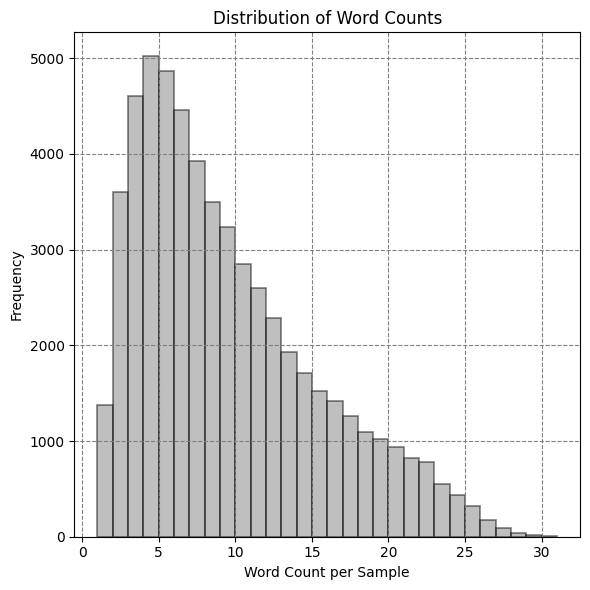

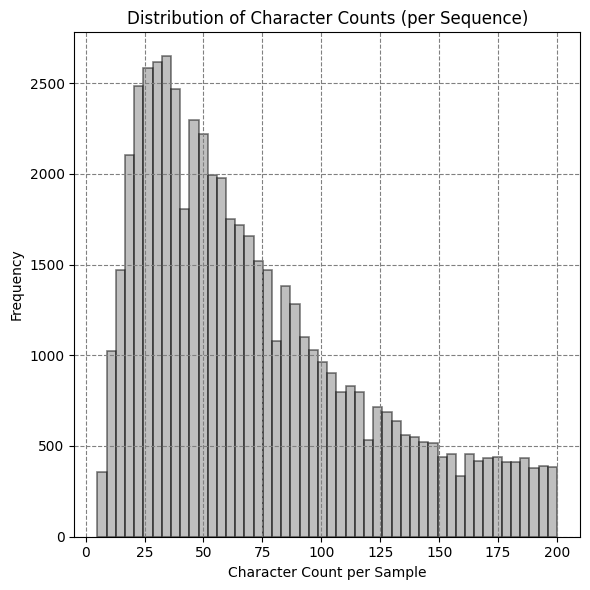

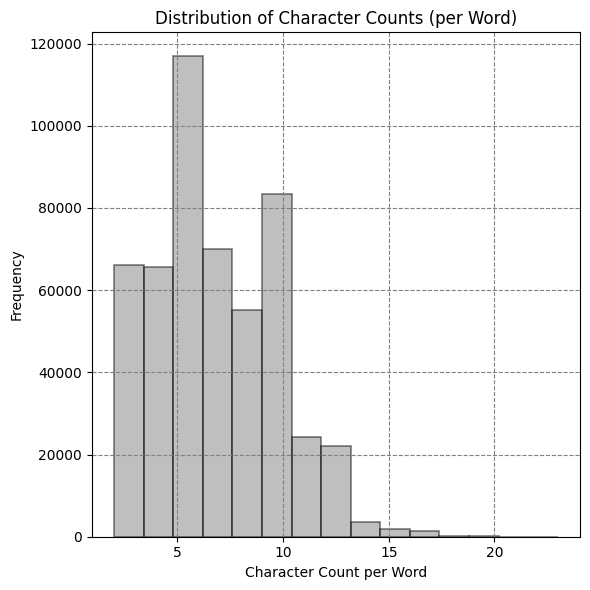

In [30]:
print("ALL DATA SUMMARY")
summary(all_texts)

TRAIN DATA SUMMARY

    Word statistics (Per Text):
        Total:      487568
        Unique:      72346
        Mean:         9.01
        STD:          5.85
        Median:       8.00
        Min:             1
        Max:            31

    Character statistics (Per Text):
        Total:     3906241
        Mean:        72.15
        STD:         47.37
        Median:      60.00
        Min:             5
        Max:           200

    Character statistics (Per Word):
        Total:     3303254
        Mean:         6.77
        STD:          2.82
        Median:       7.00
        Min:             2
        Max:            23

    Stress statistics:
        Total:                   487568
        Grave accent marks:      168472      34.55%
        Acute accent marks:      108963      22.35%
        Tilde accent marks:      210133      43.10%

    Vocab size: 50
    Vocab frequencies: {' ': 453557, 'i': 374086, 'a': 340602, 's': 220219, '̃': 210133, 't': 168878, '̀': 168472, 'e':

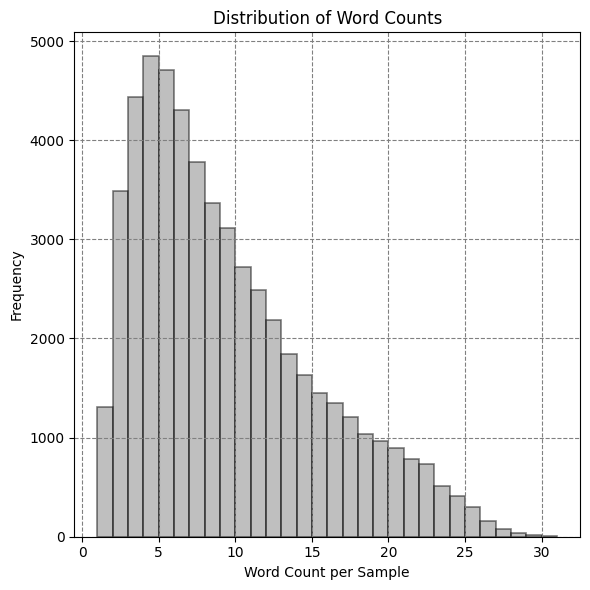

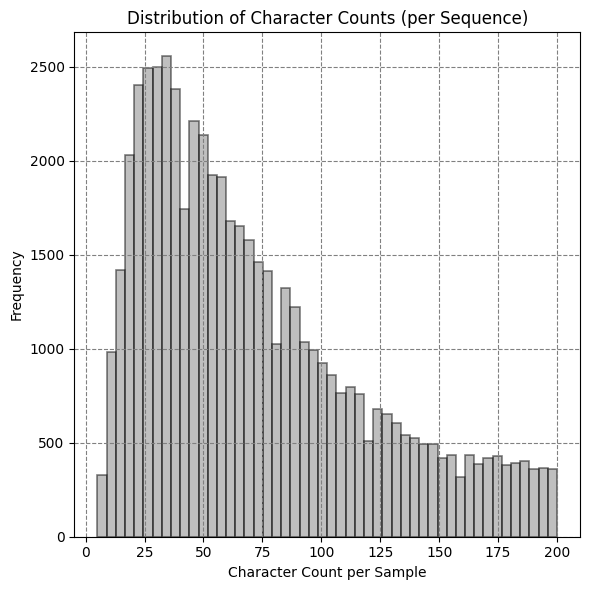

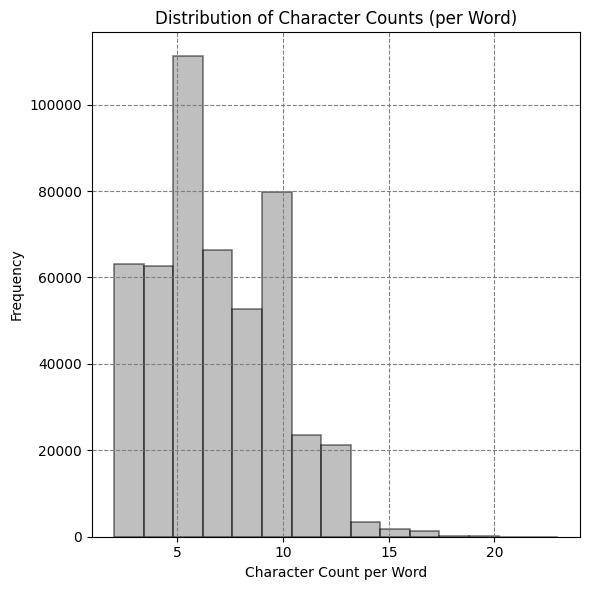

In [31]:
print("TRAIN DATA SUMMARY")
summary(train_texts)

VALIDATION DATA SUMMARY

    Word statistics (Per Text):
        Total:       22983
        Unique:       9277
        Mean:         9.98
        STD:          6.37
        Median:       9.00
        Min:             1
        Max:            29

    Character statistics (Per Text):
        Total:      179830
        Mean:        78.09
        STD:         50.07
        Median:      68.00
        Min:             5
        Max:           200

    Character statistics (Per Word):
        Total:      151526
        Mean:         6.59
        STD:          2.61
        Median:       6.00
        Min:             2
        Max:            18

    Stress statistics:
        Total:                    22983
        Grave accent marks:        7010      30.50%
        Acute accent marks:        5201      22.63%
        Tilde accent marks:       10772      46.87%

    Vocab size: 49
    Vocab frequencies: {' ': 21407, 'i': 16507, 'a': 15717, '̃': 10772, 's': 10402, 'u': 7066, '̀': 7010, 'e': 682

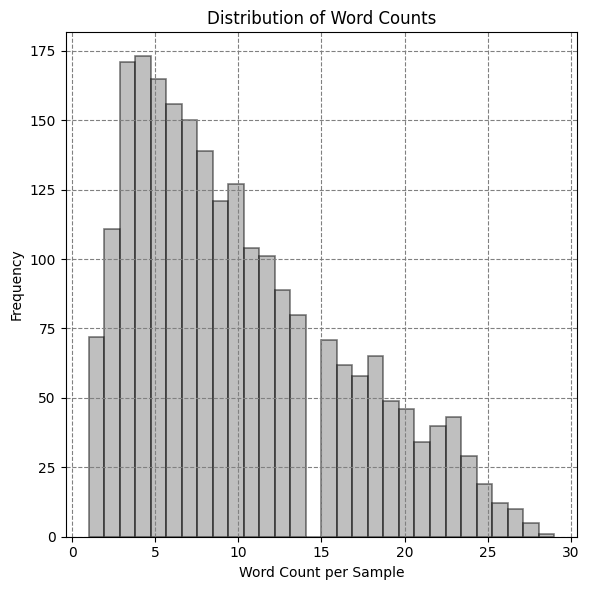

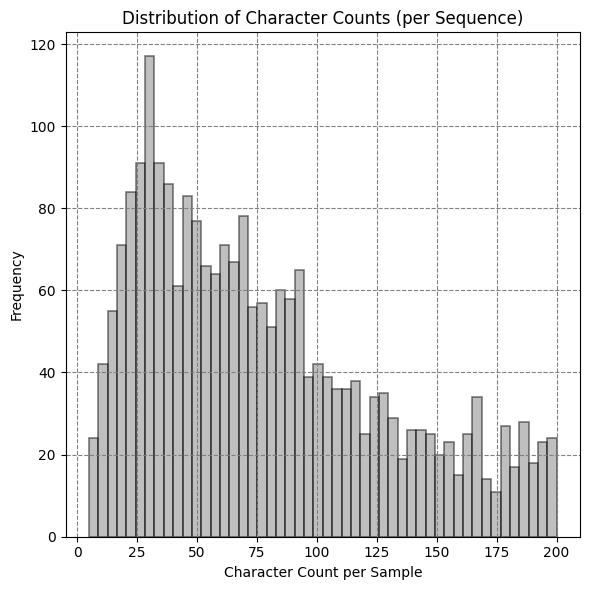

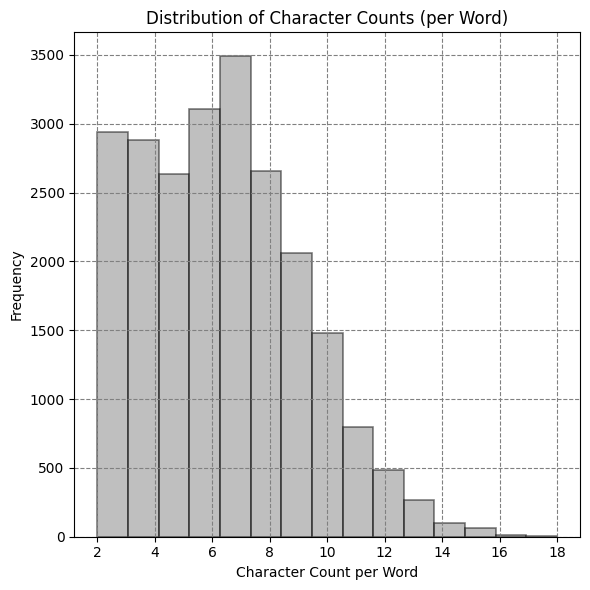

In [32]:
print("VALIDATION DATA SUMMARY")
summary(val_texts)